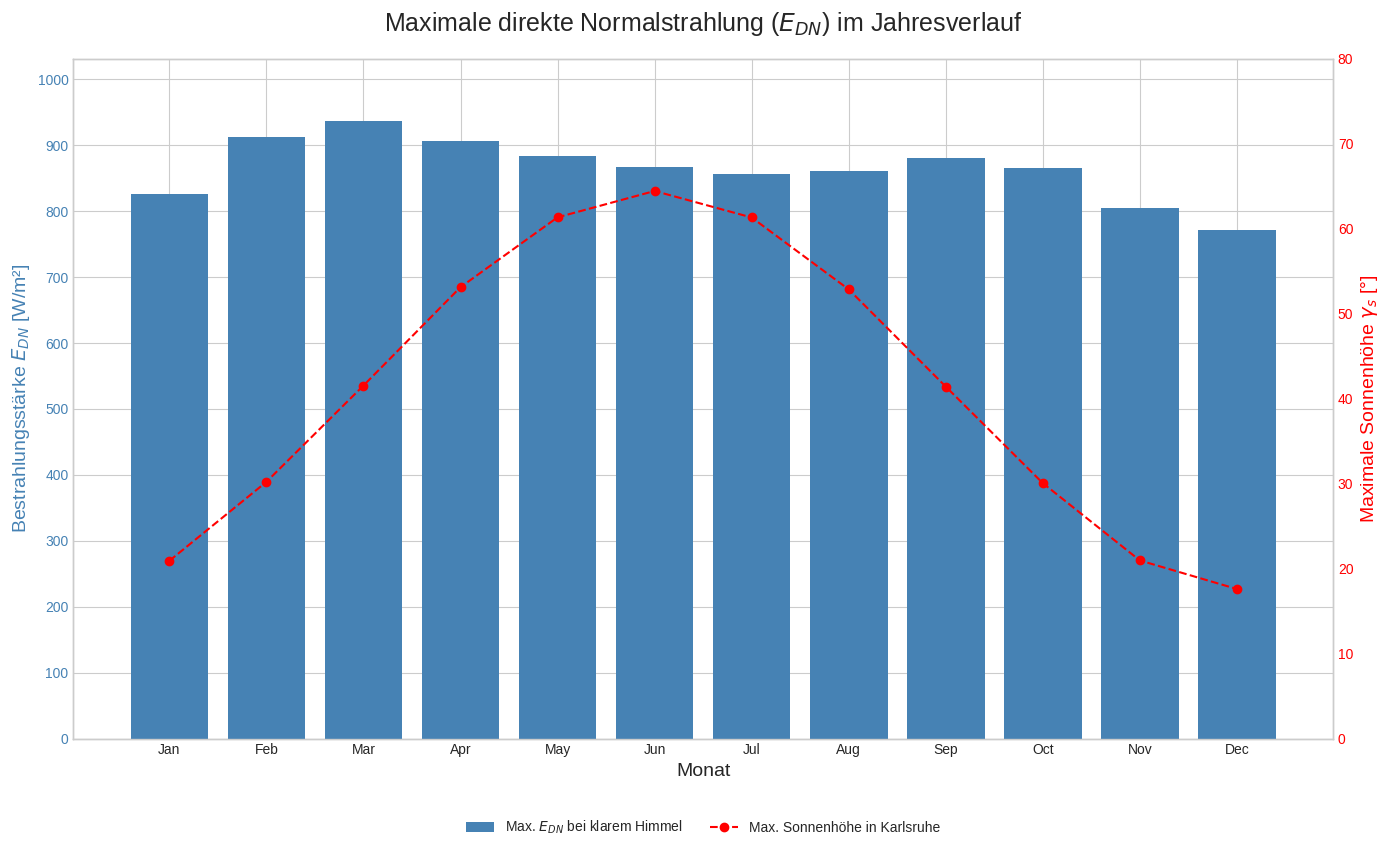

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json

# =============================================================================
# 1. DATEN LADEN UND PARAMETER DEFINIEREN
# =============================================================================

# Lade die JSON-Daten aus einer Datei
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

months = list(solar_data.keys())

# Reale maximale Sonnenhöhen für Karlsruhe
gamma_s_monthly = {
    "Jan": 20.92, "Feb": 30.21, "Mar": 41.54, "Apr": 53.12, "May": 61.34, "Jun": 64.44,
    "Jul": 61.32, "Aug": 52.86, "Sep": 41.42, "Oct": 30.06, "Nov": 20.96, "Dec": 17.6
}
gamma_s_values = list(gamma_s_monthly.values())

# =============================================================================
# 2. E_DN FÜR JEDEN MONAT BERECHNEN
# =============================================================================

E_DN_results = []
for month in months:
    A = solar_data[month]["A"]
    B = solar_data[month]["B"]
    gamma_s = gamma_s_monthly[month]
    gamma_s_rad = np.deg2rad(gamma_s)
    
    if gamma_s > 0:
        E_DN = A / (np.exp(B / np.sin(gamma_s_rad)))
        E_DN_results.append(E_DN)
    else:
        E_DN_results.append(0)

# =============================================================================
# 3. ERGEBNISSE PLOTTEN
# =============================================================================

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- Linke Y-Achse: Balkendiagramm für E_DN ---
color_bar = '#4682B4'  # Steel Blue
ax1.set_xlabel('Monat', fontsize=14)
ax1.set_ylabel('Bestrahlungsstärke $E_{DN}$ [W/m²]', color=color_bar, fontsize=14)
ax1.bar(months, E_DN_results, color=color_bar, label='Max. $E_{DN}$ bei klarem Himmel',zorder=10)
ax1.tick_params(axis='y', labelcolor=color_bar)
ax1.set_yticks(np.arange(0, 1001, 100)) 
ax1.set_ylim(0, max(E_DN_results) * 1.1)

# --- Rechte Y-Achse: Liniendiagramm für Sonnenhöhe ---
ax2 = ax1.twinx()
color_line = "#FF0000"  # Dark Orange
ax2.set_ylabel('Maximale Sonnenhöhe $\gamma_s$ [°]', color=color_line, fontsize=14)
ax2.plot(months, gamma_s_values, color=color_line, marker='o', linestyle='--', label='Max. Sonnenhöhe in Karlsruhe',)
ax2.tick_params(axis='y', labelcolor=color_line)
ax2.set_yticks(np.arange(0, 81, 10)) 
#ax2.set_ylim(0, max(E_DN_results) * 0.11)
ax2.grid(False)

# Titel und Layout
plt.title('Maximale direkte Normalstrahlung ($E_{DN}$) im Jahresverlauf', fontsize=18, pad=20)
fig.tight_layout()

# Legenden zusammenführen
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
plt.show()


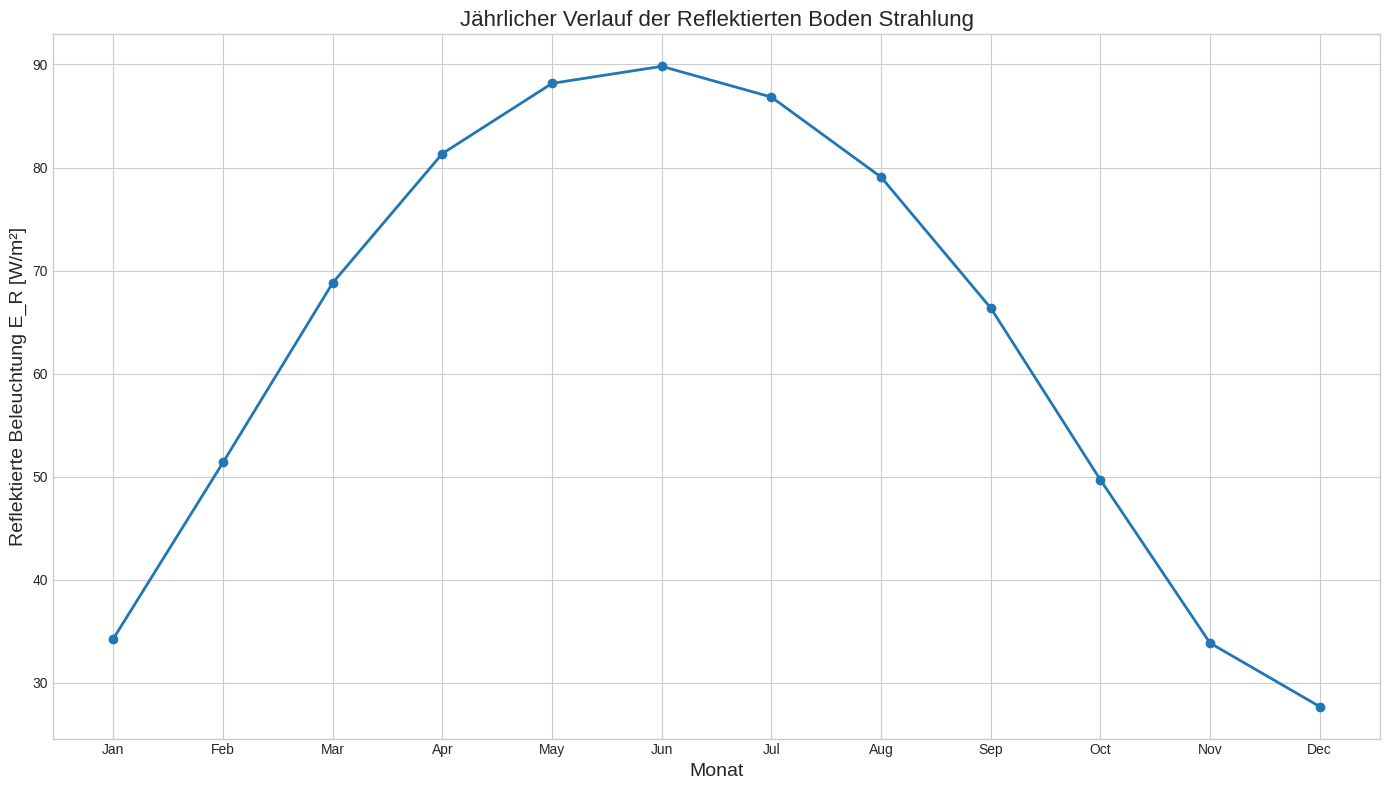

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# Lade die JSON-Daten aus einer Datei
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

months = list(solar_data.keys())
E_DN_list = []
E_R_list = []
gamma_s_monthly = {
    "Jan": 20.92, "Feb": 30.21, "Mar": 41.54, "Apr": 53.12, "May": 61.34, "Jun": 64.44,
    "Jul": 61.32, "Aug": 52.86, "Sep": 41.42, "Oct": 30.06, "Nov": 20.96, "Dec": 17.6
}
gamma_s_values = list(gamma_s_monthly.values())
p_g=0.2

# Berechnungen für jeden Monat
for month in months:
    A = solar_data[month]["A"]
    B = solar_data[month]["B"]
    C = solar_data[month]["C"]
    gamma_s = gamma_s_monthly[month]

    gamma_s_rad = np.deg2rad(gamma_s)
    E_DN = A / np.exp(B / np.sin(gamma_s_rad))  
    E_R=E_DN *(C+np.sin(gamma_s_rad))*p_g*0.5

    E_R_list.append(E_R)

# Plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))
plt.plot(months, E_R_list, marker='o', label='$E_R$', linewidth=2)

plt.title('Jährlicher Verlauf der Reflektierten Boden Strahlung', fontsize=16)
plt.xlabel('Monat', fontsize=14)
plt.ylabel('Reflektierte Beleuchtung E_R [W/m²]', fontsize=14)
#plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


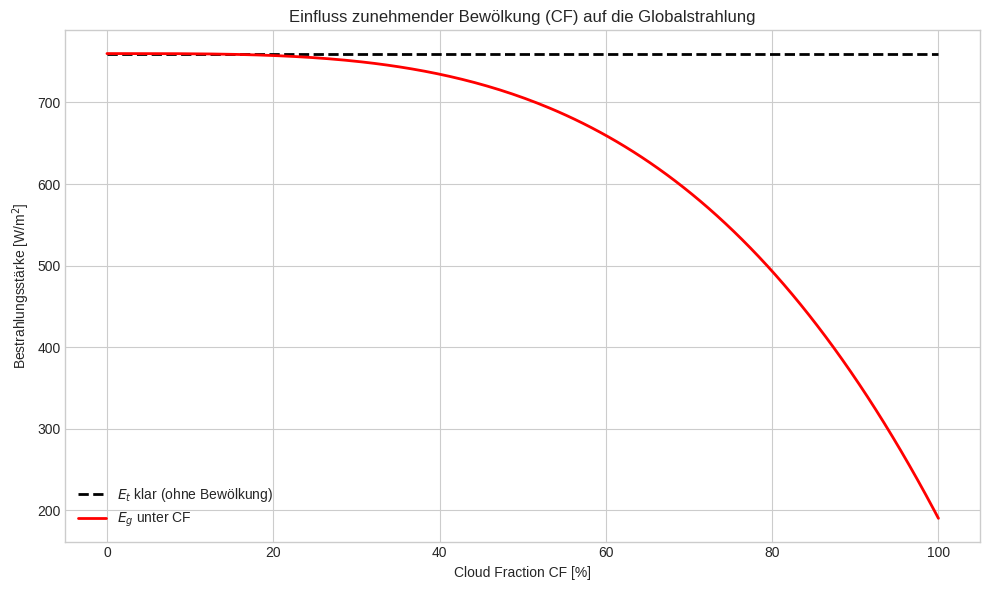

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Cloud Fraction von 0 bis 100 %
CF_values = np.linspace(0, 100, 200)

# Wolkenfaktor nach Gl. (3.14)
F_CF = 1 - 0.75 * (CF_values/100)**3.4

# Beispiel: mittleres Et über alle Monate (oder nimm dein E_t_array[i] für einen Monat)
E_t_mean = np.mean(E_t_array)

# Globalstrahlung bei Bewölkung nach Gl. (3.15)
E_g = E_t_mean * F_CF

# Plot
plt.figure(figsize=(10,6))
plt.plot(CF_values, np.full_like(CF_values, E_t_mean), 'k--', linewidth=2, label=r"$E_t$ klar (ohne Bewölkung)")
plt.plot(CF_values, E_g, 'r-', linewidth=2, label=r"$E_g$ unter CF")

plt.title("Einfluss zunehmender Bewölkung (CF) auf die Globalstrahlung")
plt.xlabel("Cloud Fraction CF [%]")
plt.ylabel(r"Bestrahlungsstärke [W/m$^2$]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


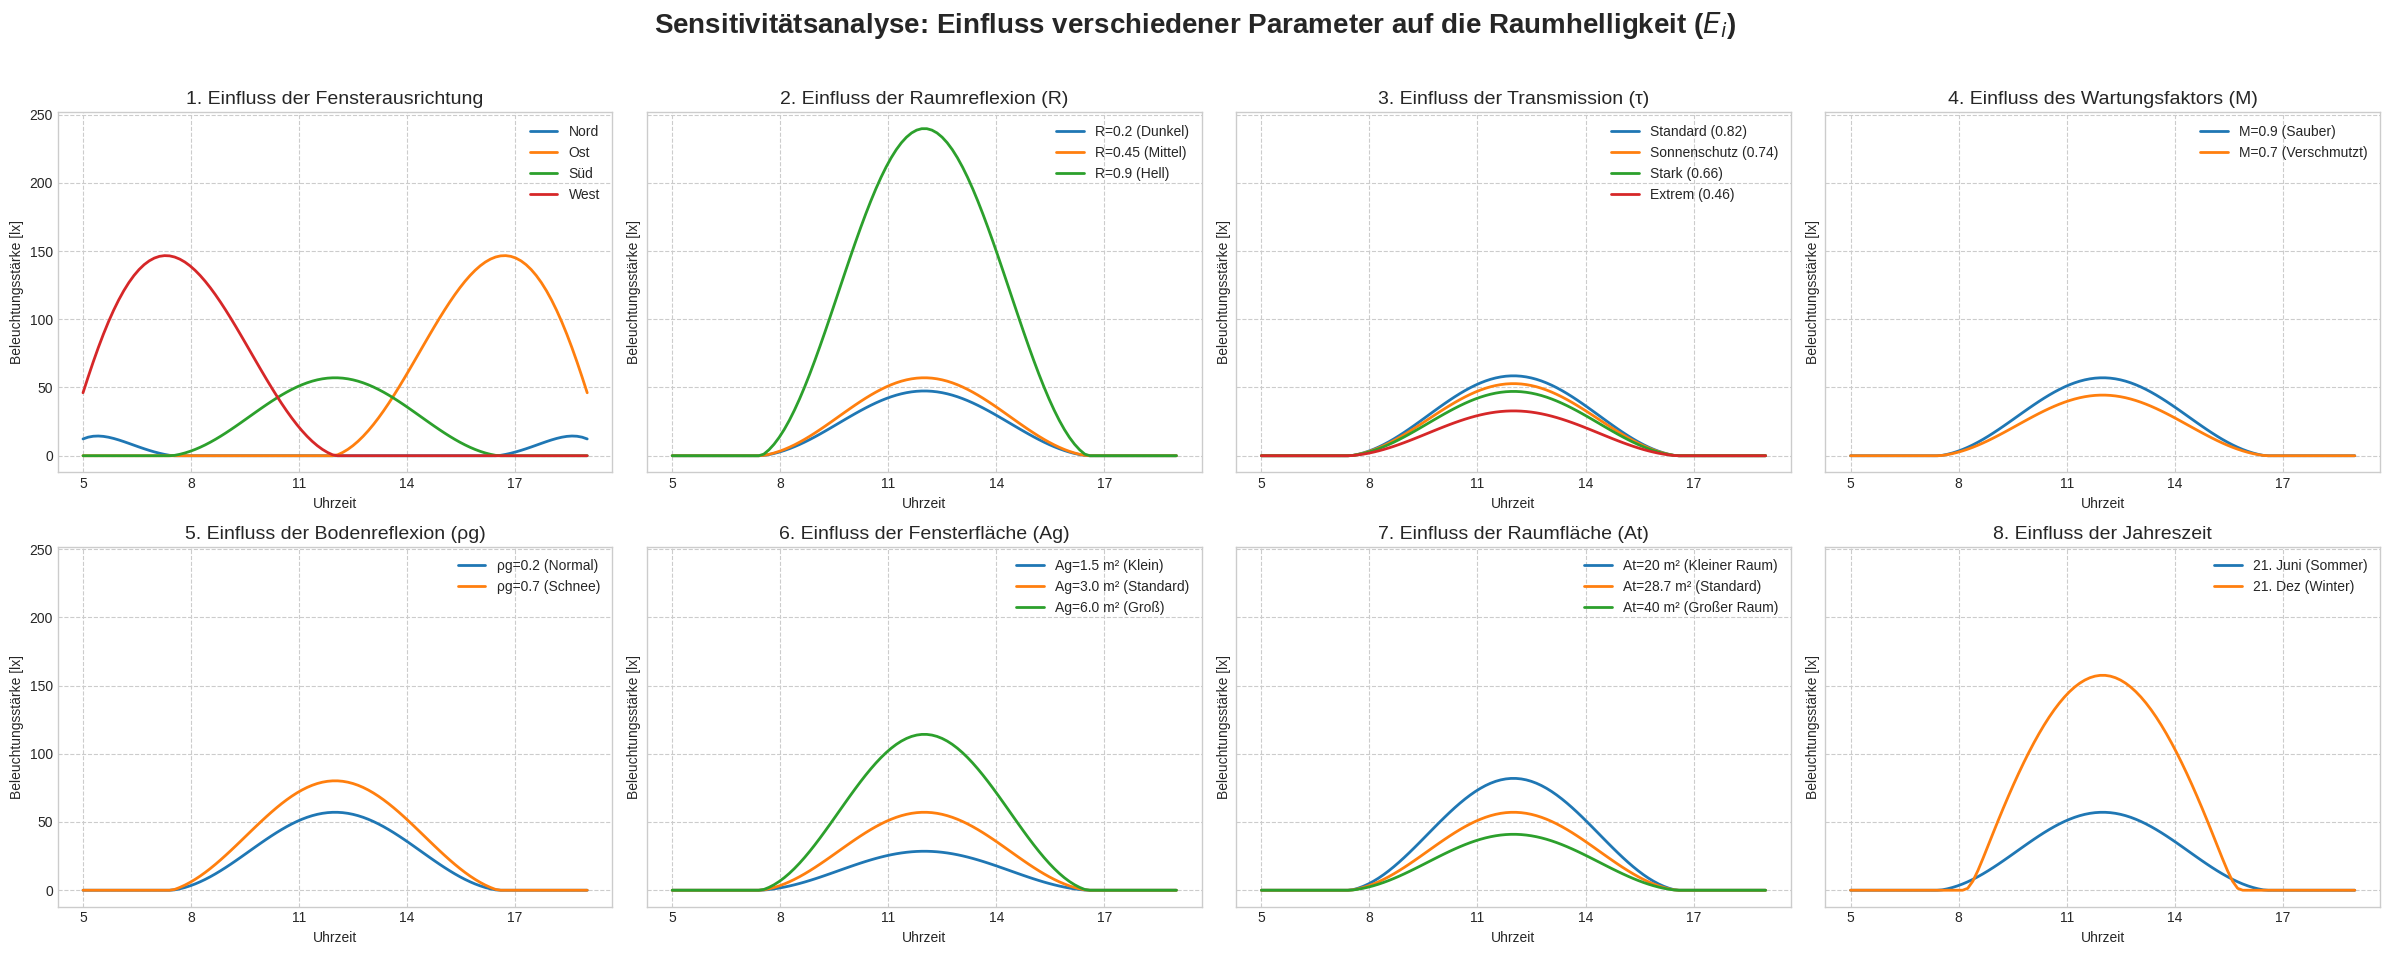

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

# =============================================================================
# 1) DATEN LADEN & HELFERFUNKTIONEN
# =============================================================================
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

def get_month_params_safe(day_of_year):
    month_boundaries = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
    for i, boundary in enumerate(month_boundaries):
        if day_of_year <= boundary:
            return solar_data[list(solar_data.keys())[i]]
    return solar_data['Dec']

def get_sun_pos(day_of_year, hour_of_day, lat=49.0):
    lat_rad = np.deg2rad(lat)
    B_angle = np.deg2rad(360/365 * (day_of_year - 81))  # (nicht direkt genutzt, belassen)
    solar_declination = np.deg2rad(-23.45 * np.cos(np.deg2rad(360/365 * (day_of_year + 10))))
    hour_angle = np.deg2rad(15 * (hour_of_day - 12))
    sin_gamma_s_rad = (
        np.sin(lat_rad) * np.sin(solar_declination)
        + np.cos(lat_rad) * np.cos(solar_declination) * np.cos(hour_angle)
    )
    gamma_s_rad = np.arcsin(np.clip(sin_gamma_s_rad, -1, 1))
    cos_azimuth_rad = (
        (np.sin(solar_declination) - np.sin(lat_rad) * np.sin(gamma_s_rad))
        / (np.cos(lat_rad) * np.cos(gamma_s_rad))
    )
    azimuth_rad = np.arccos(np.clip(cos_azimuth_rad, -1, 1))
    azimuth_deg = np.rad2deg(azimuth_rad)
    if isinstance(hour_of_day, np.ndarray):
        azimuth_deg[hour_of_day > 12] = 360 - azimuth_deg[hour_of_day > 12]
    elif hour_of_day > 12:
        azimuth_deg = 360 - azimuth_deg
    return np.rad2deg(gamma_s_rad), azimuth_deg

# =============================================================================
# 2) ZENTRALE BERECHNUNGSFUNKTION
# =============================================================================
def calculate_day_Ei(day_of_year, psi, R, tau, M, p_g, Ag=3.0, At=28.7):
    hours = np.linspace(5, 19, 100)
    gamma_s_values, phi_values = get_sun_pos(day_of_year, hours)
    params = get_month_params_safe(day_of_year)
    A, B, C = params['A'], params['B'], params['C']
    E_i_list = []

    for gamma_s_deg, phi_deg in zip(gamma_s_values, phi_values):
        if gamma_s_deg > 0:
            gamma_s_rad = np.deg2rad(gamma_s_deg)
            E_DN = A / np.exp(B / np.sin(gamma_s_rad))
            gamma_deg = phi_deg - 180 - psi
            cos_theta_v = np.cos(gamma_s_rad) * np.cos(np.deg2rad(gamma_deg))
            cos_theta_v = max(0, cos_theta_v)

            E_DNV = E_DN * cos_theta_v
            Y = 0.55 + 0.437 * cos_theta_v + 0.313 * cos_theta_v**2
            E_d = C * Y * E_DN
            E_R = E_DN * (C + np.sin(gamma_s_rad)) * p_g * 0.5
            E_t = E_DNV + E_d + E_R

            eta = 59.3 * gamma_s_deg**0.1252
            denominator = At * (1 - R**2 if R < 1 else 1e-6) * 0.396 * 100
            numerator = Ag * tau * cos_theta_v * M * E_t * eta
            E_i = numerator / denominator if denominator != 0 else 0
            E_i_list.append(E_i)
        else:
            E_i_list.append(0)
    return hours, E_i_list

# =============================================================================
# 3) ALLE PLOTS IN EINEM 2x4-Raster (ohne doppeltes "Jahreszeit")
# =============================================================================
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 4, figsize=(24, 10), sharey=True)
axes = axes.flatten()

# --- Plot 1: Einfluss der Fensterausrichtung (psi) ---
orientations = {'Nord': 180, 'Ost': 90, 'Süd': 0, 'West': -90}
for name, psi in orientations.items():
    hours, Ei = calculate_day_Ei(day_of_year=172, psi=psi, R=0.45, tau=0.8, M=0.9, p_g=0.2)
    axes[0].plot(hours, Ei, label=name, lw=2)
axes[0].set_title('1. Einfluss der Fensterausrichtung', fontsize=14)
axes[0].legend()

# --- Plot 2: Einfluss der Raumreflexion (R) ---
for R_val, label in zip([0.2, 0.45, 0.9], ['Dunkel', 'Mittel', 'Hell']):
    hours, Ei = calculate_day_Ei(day_of_year=172, psi=0, R=R_val, tau=0.8, M=0.9, p_g=0.2)
    axes[1].plot(hours, Ei, label=f'R={R_val} ({label})', lw=2)
axes[1].set_title('2. Einfluss der Raumreflexion (R)', fontsize=14)
axes[1].legend()

# --- Plot 3: Einfluss der Transmission (τ) ---
tau_vals = [0.82, 0.74, 0.66, 0.46]
tau_labels = ['Standard (0.82)', 'Sonnenschutz (0.74)', 'Stark (0.66)', 'Extrem (0.46)']
for tau_val, label in zip(tau_vals, tau_labels):
    hours, Ei = calculate_day_Ei(day_of_year=172, psi=0, R=0.45, tau=tau_val, M=0.9, p_g=0.2)
    axes[2].plot(hours, Ei, label=label, lw=2)
axes[2].set_title('3. Einfluss der Transmission (τ)', fontsize=14)
axes[2].legend()

# --- Plot 4: Einfluss des Wartungsfaktors (M) ---
for M_val, label in zip([0.9, 0.7], ['Sauber', 'Verschmutzt']):
    hours, Ei = calculate_day_Ei(day_of_year=172, psi=0, R=0.45, tau=0.8, M=M_val, p_g=0.2)
    axes[3].plot(hours, Ei, label=f'M={M_val} ({label})', lw=2)
axes[3].set_title('4. Einfluss des Wartungsfaktors (M)', fontsize=14)
axes[3].legend()

# --- Plot 5: Einfluss der Bodenreflexion (ρg) ---
for p_g_val, label in zip([0.2, 0.7], ['Normal', 'Schnee']):
    hours, Ei = calculate_day_Ei(day_of_year=172, psi=0, R=0.45, tau=0.8, M=0.9, p_g=p_g_val)
    axes[4].plot(hours, Ei, label=f'ρg={p_g_val} ({label})', lw=2)
axes[4].set_title('5. Einfluss der Bodenreflexion (ρg)', fontsize=14)
axes[4].legend()

# --- Plot 6: Einfluss der Fensterfläche (Ag) ---
for Ag_val, label in zip([1.5, 3.0, 6.0], ['Klein', 'Standard', 'Groß']):
    hours, Ei = calculate_day_Ei(day_of_year=172, psi=0, R=0.45, tau=0.8, M=0.9, p_g=0.2, Ag=Ag_val, At=28.7)
    axes[5].plot(hours, Ei, label=f'Ag={Ag_val} m² ({label})', lw=2)
axes[5].set_title('6. Einfluss der Fensterfläche (Ag)', fontsize=14)
axes[5].legend()

# --- Plot 7: Einfluss der Raumfläche (At) ---
for At_val, label in zip([20, 28.7, 40], ['Kleiner Raum', 'Standard', 'Großer Raum']):
    hours, Ei = calculate_day_Ei(day_of_year=172, psi=0, R=0.45, tau=0.8, M=0.9, p_g=0.2, Ag=3.0, At=At_val)
    axes[6].plot(hours, Ei, label=f'At={At_val} m² ({label})', lw=2)
axes[6].set_title('7. Einfluss der Raumfläche (At)', fontsize=14)
axes[6].legend()

# --- Plot 8: Einfluss der Jahreszeit (nur einmal) ---
for day, label in zip([172, 355], ['21. Juni (Sommer)', '21. Dez (Winter)']):
    hours, Ei = calculate_day_Ei(day_of_year=day, psi=0, R=0.45, tau=0.8, M=0.9, p_g=0.2, Ag=3.0, At=28.7)
    axes[7].plot(hours, Ei, label=label, lw=2)
axes[7].set_title('8. Einfluss der Jahreszeit', fontsize=14)
axes[7].legend()

# Allgemeine Achsen-Einstellungen
for ax in axes:
    ax.set_ylabel('Beleuchtungsstärke [lx]', fontsize=10)
    ax.set_xlabel('Uhrzeit', fontsize=10)
    ax.set_xticks(np.arange(5, 20, 3))
    ax.grid(True, linestyle='--')

fig.suptitle('Sensitivitätsanalyse: Einfluss verschiedener Parameter auf die Raumhelligkeit ($E_i$)', 
             fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()


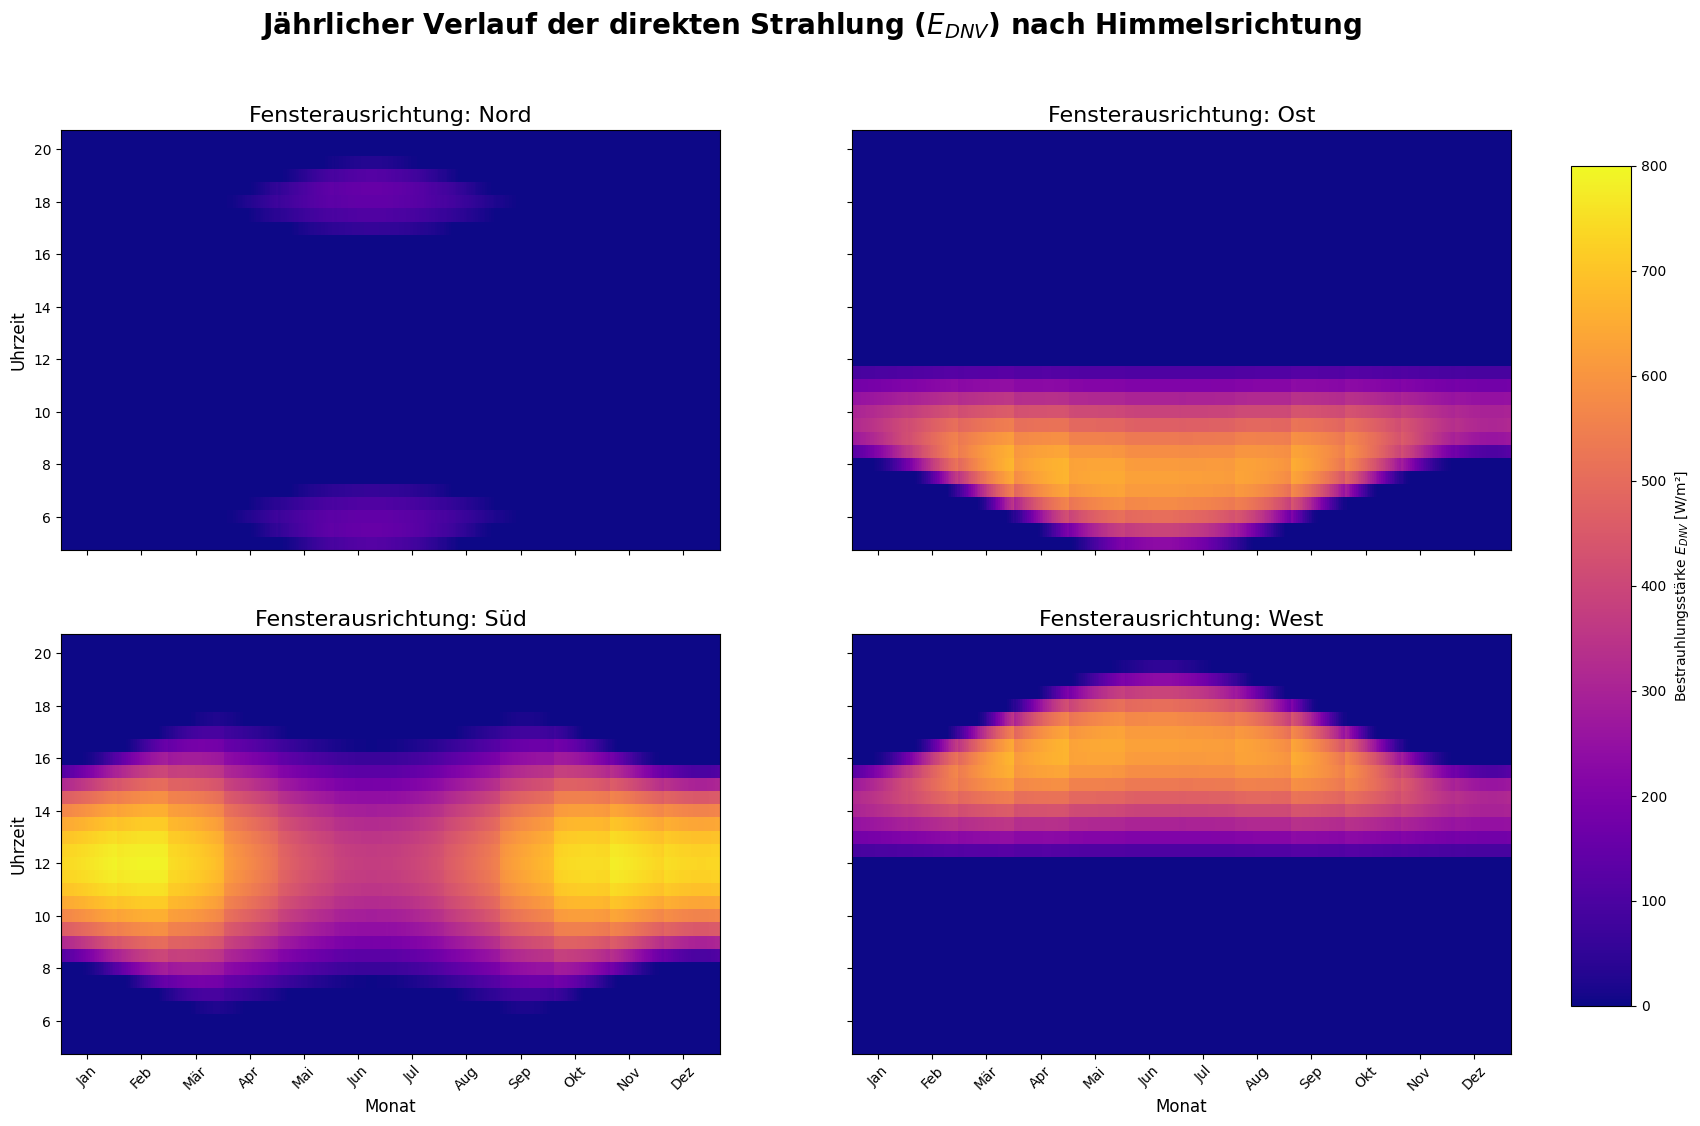

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json

# =============================================================================
# 1. DATEN LADEN UND HELFERFUNKTIONEN
# =============================================================================
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

ashrae_params_list = [solar_data[m] for m in ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]]

def get_month_params_safe(day_of_year):
    month_boundaries = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
    for i, boundary in enumerate(month_boundaries):
        if day_of_year <= boundary:
            return ashrae_params_list[i]
    return ashrae_params_list[-1]

def get_sun_pos(day_of_year, hour_of_day, lat=49.0):
    lat_rad = np.deg2rad(lat)
    B_angle = np.deg2rad(360/365 * (day_of_year - 81))
    solar_declination = np.deg2rad(-23.45 * np.cos(np.deg2rad(360/365 * (day_of_year + 10))))
    hour_angle = np.deg2rad(15 * (hour_of_day - 12))
    sin_gamma_s_rad = np.sin(lat_rad) * np.sin(solar_declination) + np.cos(lat_rad) * np.cos(solar_declination) * np.cos(hour_angle)
    gamma_s_rad = np.arcsin(np.clip(sin_gamma_s_rad, -1, 1))
    cos_azimuth_rad = (np.sin(solar_declination) - np.sin(lat_rad) * np.sin(gamma_s_rad)) / (np.cos(lat_rad) * np.cos(gamma_s_rad))
    azimuth_rad = np.arccos(np.clip(cos_azimuth_rad, -1, 1))
    azimuth_deg = np.rad2deg(azimuth_rad)
    if isinstance(hour_of_day, np.ndarray):
        azimuth_deg[hour_of_day > 12] = 360 - azimuth_deg[hour_of_day > 12]
    elif hour_of_day > 12:
        azimuth_deg = 360 - azimuth_deg
    return np.rad2deg(gamma_s_rad), azimuth_deg

# =============================================================================
# 2. BERECHNUNG DER JÄHRLICHEN DATEN FÜR JEDE AUSRICHTUNG
# =============================================================================
#psi_values = {'Nord': 180, 'Ost': 90, 'Süd': 0, 'West': -90}
psi_values = {'Nord': 0, 'Ost': 90, 'Süd': 180, 'West': 270}
days = np.arange(1, 366)
hours = np.arange(5, 21, 0.5)

results = {}

for name, psi in psi_values.items():
    E_DNV_grid = np.zeros((len(hours), len(days)))
    for d_idx, day in enumerate(days):
        gamma_s_arr, phi_arr = get_sun_pos(day, hours)
        params = get_month_params_safe(day)
        A, B = params['A'], params['B']
        
        for h_idx, hour in enumerate(hours):
            gamma_s = gamma_s_arr[h_idx]
            phi = phi_arr[h_idx]
            
            if gamma_s > 0:
                gamma_s_rad = np.deg2rad(gamma_s)
                E_DN = A / np.exp(B / np.sin(gamma_s_rad))
                
                gamma = phi  - psi
                gamma_rad = np.deg2rad(gamma)
                
                cos_theta_v = np.cos(gamma_s_rad) * np.cos(gamma_rad)
                
                if cos_theta_v > 0:
                    E_DNV_grid[h_idx, d_idx] = E_DN * cos_theta_v
    results[name] = E_DNV_grid

# =============================================================================
# 3. PLOT: 2x2 Heatmap für jede Himmelsrichtung
# =============================================================================
# HIER DIE ÄNDERUNG: figsize etwas angepasst für besseres Verhältnis
fig, axes = plt.subplots(2, 2, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()
cmap = 'plasma'
vmax = 800

month_days_ticks = [15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]
month_names = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']

for i, name in enumerate(['Nord', 'Ost', 'Süd', 'West']):
    ax = axes[i]
    data = results[name]
    im = ax.pcolormesh(days, hours, data, cmap=cmap, shading='auto', vmax=vmax, vmin=0)
    ax.set_title(f'Fensterausrichtung: {name}', fontsize=16)
    
    if i >= 2:
        ax.set_xlabel('Monat', fontsize=12)
        ax.set_xticks(month_days_ticks)
        ax.set_xticklabels(month_names, rotation=45) # Texte gedreht für bessere Lesbarkeit
    
    if i % 2 == 0:
        ax.set_ylabel('Uhrzeit', fontsize=12)

# Haupttitel
fig.suptitle('Jährlicher Verlauf der direkten Strahlung ($E_{DNV}$) nach Himmelsrichtung', fontsize=20, fontweight='bold')

# HIER DIE ÄNDERUNG: Layout wird angepasst, um Platz für die Legende zu schaffen
# Wir passen den rechten Rand der Subplots an und schaffen Platz für die Colorbar
fig.subplots_adjust(right=0.85) 
# Wir erstellen eine neue Achse für die Colorbar in dem freigewordenen Platz
cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7]) # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, label='Bestrauhlungsstärke $E_{DNV}$ [W/m²]')


plt.show()

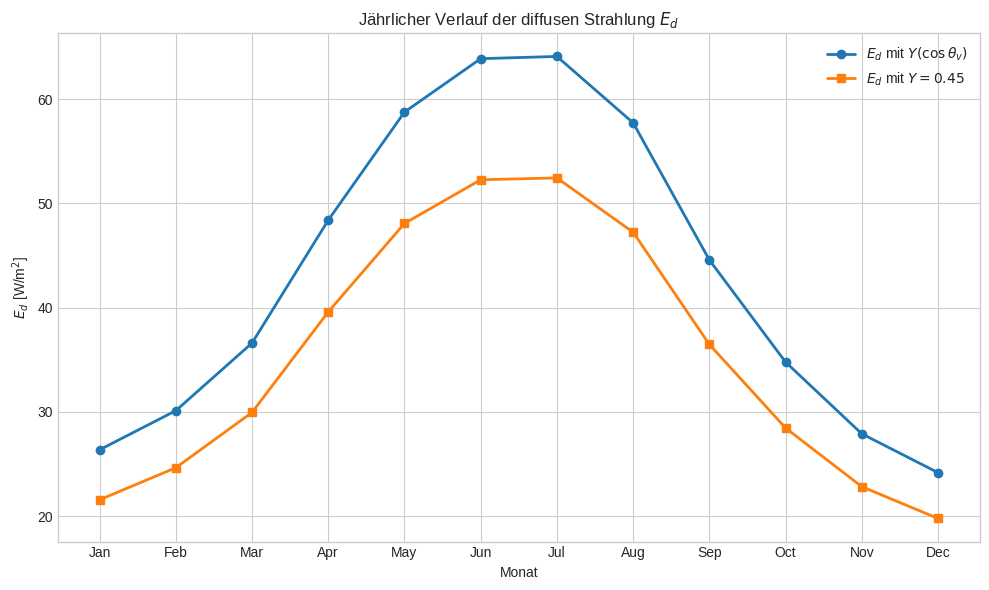

In [14]:
import json
import numpy as np
import matplotlib.pyplot as plt

# --- Daten laden ---
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# Sonnenhöhen (γs) für Karlsruhe (Mittag, Solarnoon)
gamma_s_monthly = {
    "Jan": 20.92, "Feb": 30.21, "Mar": 41.54, "Apr": 53.12, "May": 61.34, "Jun": 64.44,
    "Jul": 61.32, "Aug": 52.86, "Sep": 41.42, "Oct": 30.06, "Nov": 20.96, "Dec": 17.60
}

# Azimut mittags im Modell: Süden = 0°
phi_deg = 180  

# >>> Hier die Fensterausrichtung einstellen (Süd=0, West=90, Nord=180, Ost=-90)
psi_deg = 90   # Beispiel: Westfenster

E_d_Ypoly = []
E_d_Yconst = []

for m in months:
    A = solar_data[m]["A"]
    B = solar_data[m]["B"]
    C = solar_data[m]["C"]

    gamma_s_deg = gamma_s_monthly[m]
    gamma_s_rad = np.deg2rad(gamma_s_deg)

    # Direktstrahlung
    E_DN = A / np.exp(B / np.sin(gamma_s_rad))

    # Azimutwinkel gamma (abhängig von Sonne und Fenster)
    gamma = np.deg2rad((phi_deg - 180) - psi_deg)

    # cos(theta_v) nach Handbuch-Formel
    cos_theta_v = np.cos(gamma_s_rad) * np.cos(gamma)

    # Y nach Fallunterscheidung
    if cos_theta_v > -0.2:
        Y = 0.55 + 0.437*cos_theta_v + 0.313*(cos_theta_v**2)
    else:
        Y = 0.45

    # Diffusstrahlung
    E_d_Ypoly.append(C * Y * E_DN)
    E_d_Yconst.append(C * 0.45 * E_DN)

# --- Plot ---
plt.figure(figsize=(10,6))
plt.plot(months, E_d_Ypoly,  marker='o', linewidth=2, label=r"$E_d$ mit $Y(\cos\theta_v)$")
plt.plot(months, E_d_Yconst, marker='s', linewidth=2, label=r"$E_d$ mit $Y=0.45$")

plt.title(f"Jährlicher Verlauf der diffusen Strahlung $E_d$")
plt.xlabel("Monat")
plt.ylabel(r"$E_d$ [W/m$^2$]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

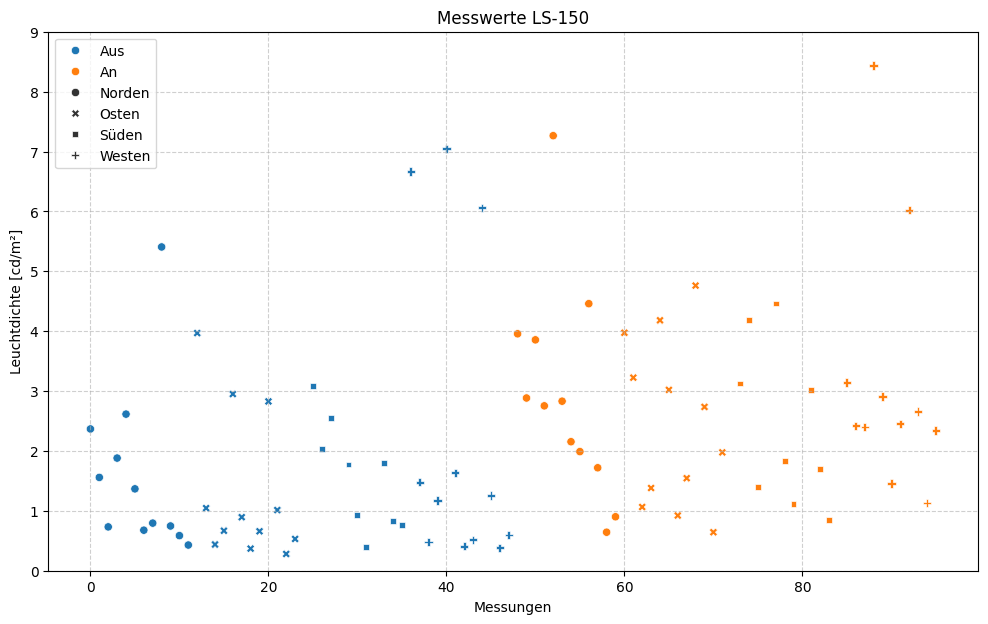

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Die Daten werden wie zuvor vorbereitet und kombiniert
data_off = {
    'Himmelsrichtung': ['Norden']*12 + ['Osten']*12 + ['Süden']*12 + ['Westen']*12,
    'Leuchtdichte': [
    2.367, 1.558, 0.732, 1.881,
    2.615, 1.367, 0.677, 0.795,
    5.406, 0.747, 0.586, 0.429,
    3.968, 1.045, 0.438, 0.668,
    2.95,  0.894, 0.369, 0.659,
    2.827, 1.013, 0.28,  0.531,
    34.48, 3.085, 2.035, 2.545,
    34.6,  1.773, 0.935, 0.399,
    32.05, 1.804, 0.823, 0.764,
    6.664, 1.478, 0.478, 1.172,
    7.044, 1.634, 0.409, 0.517,
    6.06,  1.255, 0.383, 0.595
    ]
}
df_off = pd.DataFrame(data_off)
df_off['Beleuchtung'] = 'Aus'

data_on = {
    'Himmelsrichtung': ['Norden']*12 + ['Osten']*12 + ['Süden']*12 + ['Westen']*12,
    'Leuchtdichte': [
    3.956, 2.884, 3.855, 2.753, 
    7.264, 2.831, 2.154, 1.989, 
    4.459, 1.719, 0.643, 0.901, 
    3.973, 3.224, 1.064, 1.381, 
    4.181, 3.02, 0.922, 1.545, 
    4.761, 2.735, 0.643, 1.976, 
    37.82, 3.127, 4.189, 1.405, 
    29.95, 4.462, 1.833, 1.117, 
    20.03, 3.014, 1.704, 0.843, 
    9.199, 3.142, 2.421, 2.398, 
    8.434, 2.909, 1.458, 2.453, 
    6.021, 2.661, 1.132, 2.342
    ]
}
df_on = pd.DataFrame(data_on)
df_on['Beleuchtung'] = 'An'

combined_df = pd.concat([df_off, df_on], ignore_index=True)

# Erstelle die Figur und die Achsen für den Plot
plt.figure(figsize=(12, 7))
ax = plt.gca()

# Erstelle den Plot im Stil des Residuen-Plots, ABER mit 'Leuchtdichte' auf der Y-Achse
sns.scatterplot(data=combined_df, x=combined_df.index, y='Leuchtdichte', hue='Beleuchtung', style='Himmelsrichtung', ax=ax)

# Passe die Legende an, um die Titel zu entfernen
handles, labels = ax.get_legend_handles_labels()
words_to_remove = ['Beleuchtung', 'Himmelsrichtung']
new_handles = []
new_labels = []
for h, l in zip(handles, labels):
    if l not in words_to_remove:
        new_handles.append(h)
        new_labels.append(l)
ax.legend(new_handles, new_labels)

# Setze Titel und Beschriftungen
plt.title('Messwerte LS-150')
plt.xlabel('Messungen')
plt.ylabel('Leuchtdichte [cd/m²]')
plt.grid(True, linestyle='--', alpha=0.6)

# Setze die Grenzen der Y-Achse für den Zoom
plt.ylim(0, 9)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

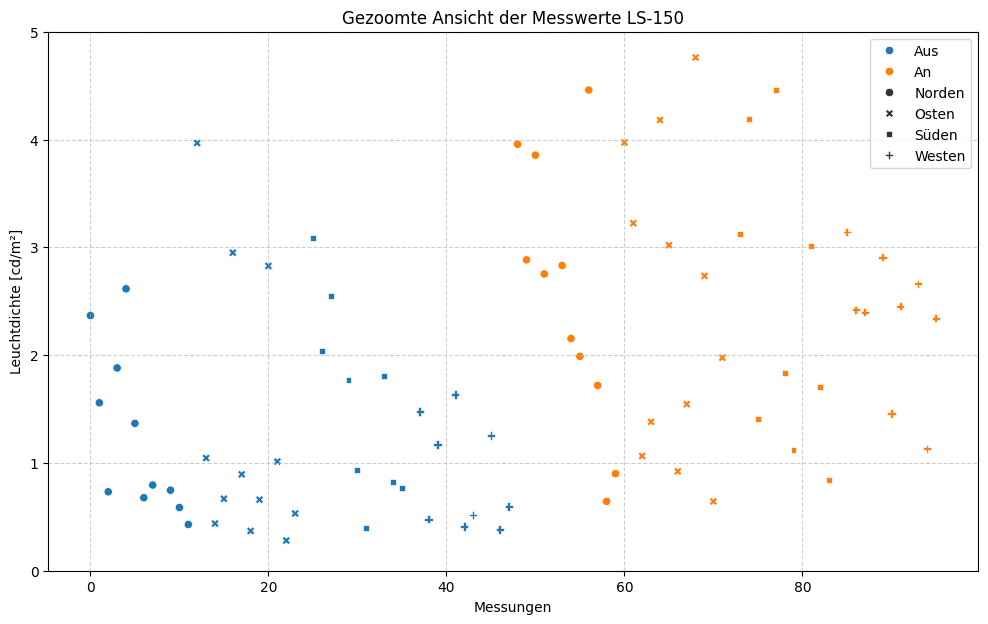

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Die Daten werden wie zuvor vorbereitet und kombiniert
data_off = {
    'Himmelsrichtung': ['Norden']*12 + ['Osten']*12 + ['Süden']*12 + ['Westen']*12,
    'Leuchtdichte': [
    2.367, 1.558, 0.732, 1.881,
    2.615, 1.367, 0.677, 0.795,
    5.406, 0.747, 0.586, 0.429,
    3.968, 1.045, 0.438, 0.668,
    2.95,  0.894, 0.369, 0.659,
    2.827, 1.013, 0.28,  0.531,
    34.48, 3.085, 2.035, 2.545,
    34.6,  1.773, 0.935, 0.399,
    32.05, 1.804, 0.823, 0.764,
    6.664, 1.478, 0.478, 1.172,
    7.044, 1.634, 0.409, 0.517,
    6.06,  1.255, 0.383, 0.595
    ]
}
df_off = pd.DataFrame(data_off)
df_off['Beleuchtung'] = 'Aus'

data_on = {
    'Himmelsrichtung': ['Norden']*12 + ['Osten']*12 + ['Süden']*12 + ['Westen']*12,
    'Leuchtdichte': [
    3.956, 2.884, 3.855, 2.753, 
    7.264, 2.831, 2.154, 1.989, 
    4.459, 1.719, 0.643, 0.901, 
    3.973, 3.224, 1.064, 1.381, 
    4.181, 3.02, 0.922, 1.545, 
    4.761, 2.735, 0.643, 1.976, 
    37.82, 3.127, 4.189, 1.405, 
    29.95, 4.462, 1.833, 1.117, 
    20.03, 3.014, 1.704, 0.843, 
    9.199, 3.142, 2.421, 2.398, 
    8.434, 2.909, 1.458, 2.453, 
    6.021, 2.661, 1.132, 2.342
    ]
}
df_on = pd.DataFrame(data_on)
df_on['Beleuchtung'] = 'An'

combined_df = pd.concat([df_off, df_on], ignore_index=True)

# Erstelle die Figur und die Achsen für den Plot
plt.figure(figsize=(12, 7))
ax = plt.gca()

# Erstelle den Plot im Stil des Residuen-Plots, ABER mit 'Leuchtdichte' auf der Y-Achse
sns.scatterplot(data=combined_df, x=combined_df.index, y='Leuchtdichte', hue='Beleuchtung', style='Himmelsrichtung', ax=ax)

# Passe die Legende an, um die Titel zu entfernen
handles, labels = ax.get_legend_handles_labels()
words_to_remove = ['Beleuchtung', 'Himmelsrichtung']
new_handles = []
new_labels = []
for h, l in zip(handles, labels):
    if l not in words_to_remove:
        new_handles.append(h)
        new_labels.append(l)
ax.legend(new_handles, new_labels)

# Setze Titel und Beschriftungen
plt.title('Gezoomte Ansicht der Messwerte LS-150')
plt.xlabel('Messungen')
plt.ylabel('Leuchtdichte [cd/m²]')
plt.grid(True, linestyle='--', alpha=0.6)

# Setze die Grenzen der Y-Achse für den Zoom
plt.ylim(0, 5)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

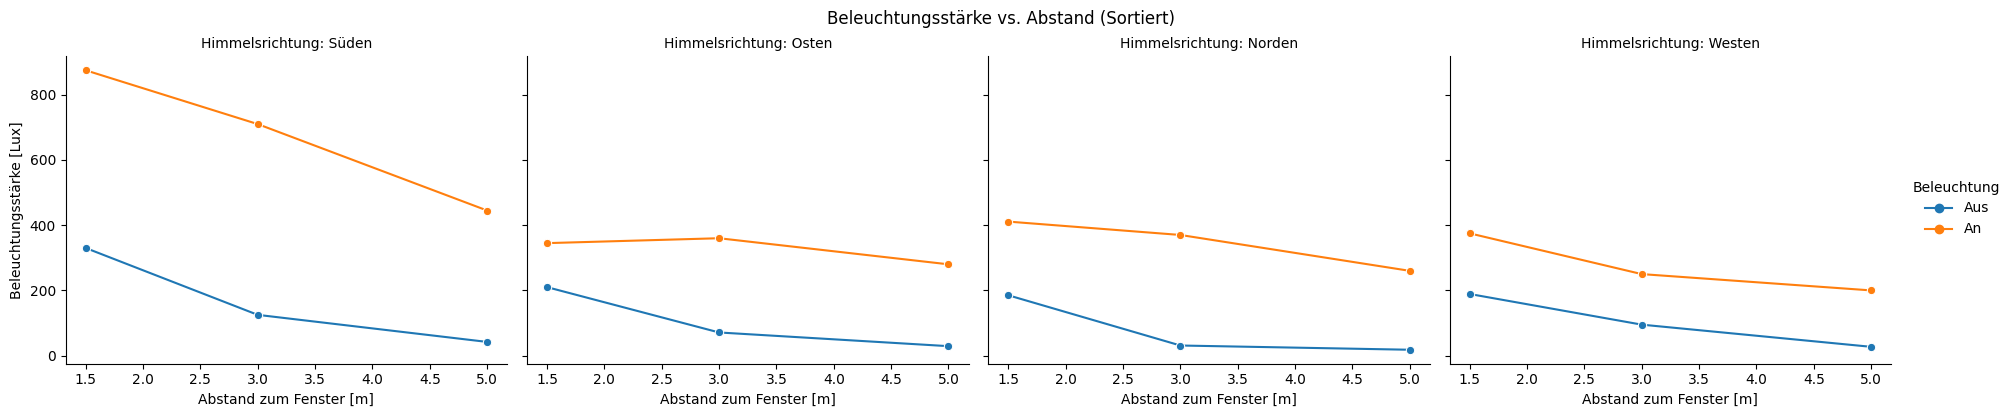

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Die Daten werden wie zuvor strukturiert
data = {
    'Abstand':      [1.5, 3, 5] * 8,
    'Himmelsrichtung':
        ['Norden']*6 + ['Osten']*6 + ['Süden']*6 + ['Westen']*6,
    'Beleuchtung':
        ['Aus']*3 + ['An']*3 + ['Aus']*3 + ['An']*3 + ['Aus']*3 + ['An']*3 + ['Aus']*3 + ['An']*3,
    'Beleuchtungsstärke': [
        # Norden (Aus, An)
        185, 31, 18,       411, 370, 260,
        # Osten (Aus, An)
        210, 71, 29,       345, 360, 280,
        # Süden (Aus, An)
        330, 125, 42,      875, 710, 445,
        # Westen (Aus, An)
        189, 95, 27,       375, 250, 200,
    ]
}
df_lux_dist = pd.DataFrame(data)

# Definiere die gewünschte Reihenfolge
sort_order = ['Süden', 'Osten', 'Norden', 'Westen']

# Erstelle die sortierte 1x4-Ansicht
g = sns.relplot(
    data=df_lux_dist,
    x='Abstand',
    y='Beleuchtungsstärke',
    hue='Beleuchtung',
    col='Himmelsrichtung',
    col_order=sort_order, # Wende die Sortierung an
    # col_wrap=2, # <-- DIESE ZEILE WURDE ENTFERNT
    kind='line',
    marker='o',
    height=4,
    aspect=1.2
)

# Setze einen übergreifenden Titel und passe die Achsenbeschriftungen an
g.fig.suptitle('Beleuchtungsstärke vs. Abstand (Sortiert)', y=1.03)
g.set_axis_labels('Abstand zum Fenster [m]', 'Beleuchtungsstärke [Lux]')
g.set_titles("Himmelsrichtung: {col_name}")
g.legend.set_title("Beleuchtung")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

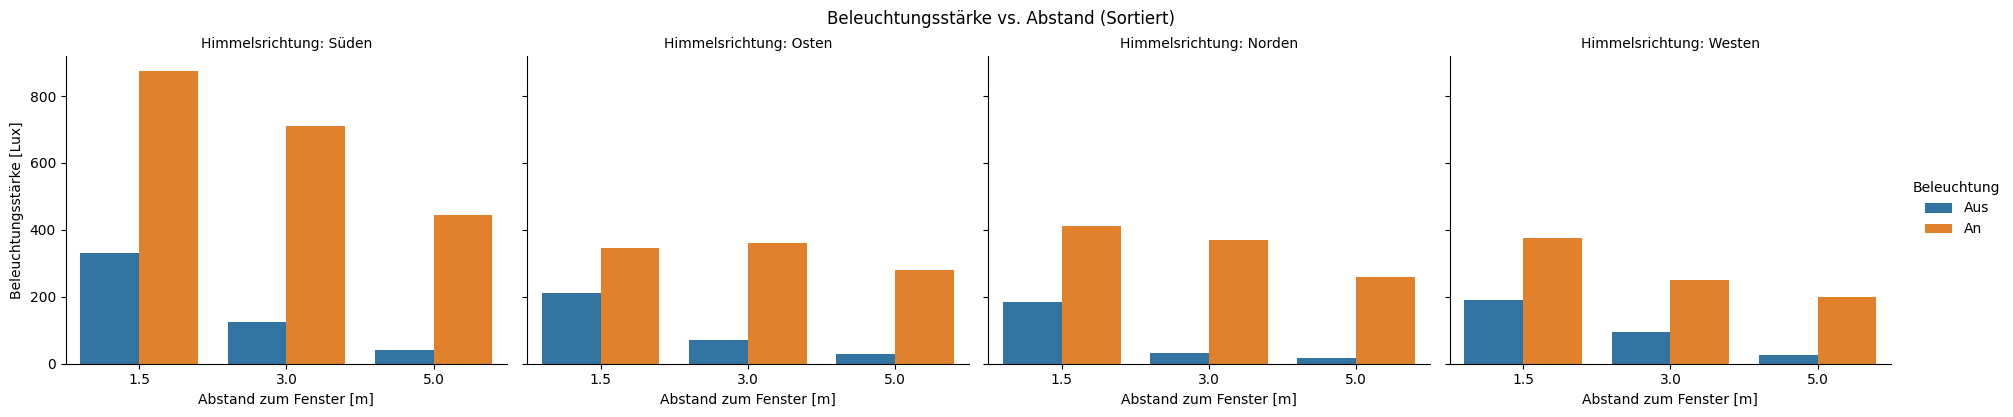

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Die Daten werden wie zuvor strukturiert
data = {
    'Abstand':      [1.5, 3, 5] * 8,
    'Himmelsrichtung':
        ['Norden']*6 + ['Osten']*6 + ['Süden']*6 + ['Westen']*6,
    'Beleuchtung':
        ['Aus']*3 + ['An']*3 + ['Aus']*3 + ['An']*3 + ['Aus']*3 + ['An']*3 + ['Aus']*3 + ['An']*3,
    'Beleuchtungsstärke': [
        # Norden (Aus, An)
        185, 31, 18,       411, 370, 260,
        # Osten (Aus, An)
        210, 71, 29,       345, 360, 280,
        # Süden (Aus, An)
        330, 125, 42,      875, 710, 445,
        # Westen (Aus, An)
        189, 95, 27,       375, 250, 200,
    ]
}
df_lux_dist = pd.DataFrame(data)

# HIER IST DIE ÄNDERUNG: Definiere die gewünschte Reihenfolge
sort_order = ['Süden', 'Osten', 'Norden', 'Westen']

# Erstelle die 1x4-Ansicht mit sortierten Balkendiagrammen
g = sns.catplot(
    data=df_lux_dist,
    x='Abstand',
    y='Beleuchtungsstärke',
    hue='Beleuchtung',
    col='Himmelsrichtung',
    col_order=sort_order, # Wende die Sortierung an
    kind='bar',
    height=4,
    aspect=1.2
)

# Setze einen übergreifenden Titel und passe die Achsenbeschriftungen an
g.fig.suptitle('Beleuchtungsstärke vs. Abstand (Sortiert)', y=1.03)
g.set_axis_labels('Abstand zum Fenster [m]', 'Beleuchtungsstärke [Lux]')
g.set_titles("Himmelsrichtung: {col_name}")
g.legend.set_title("Beleuchtung")

plt.show

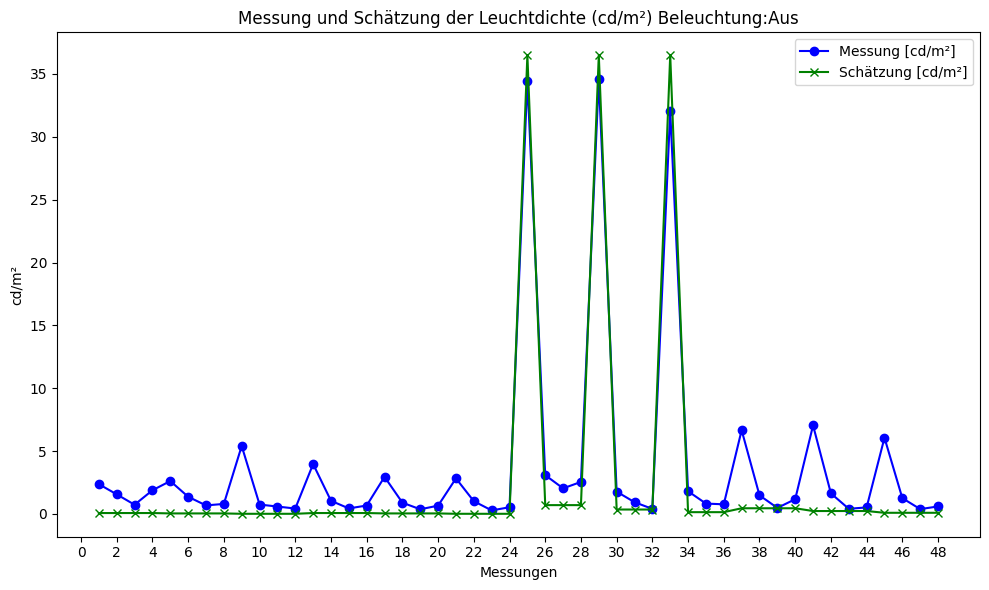

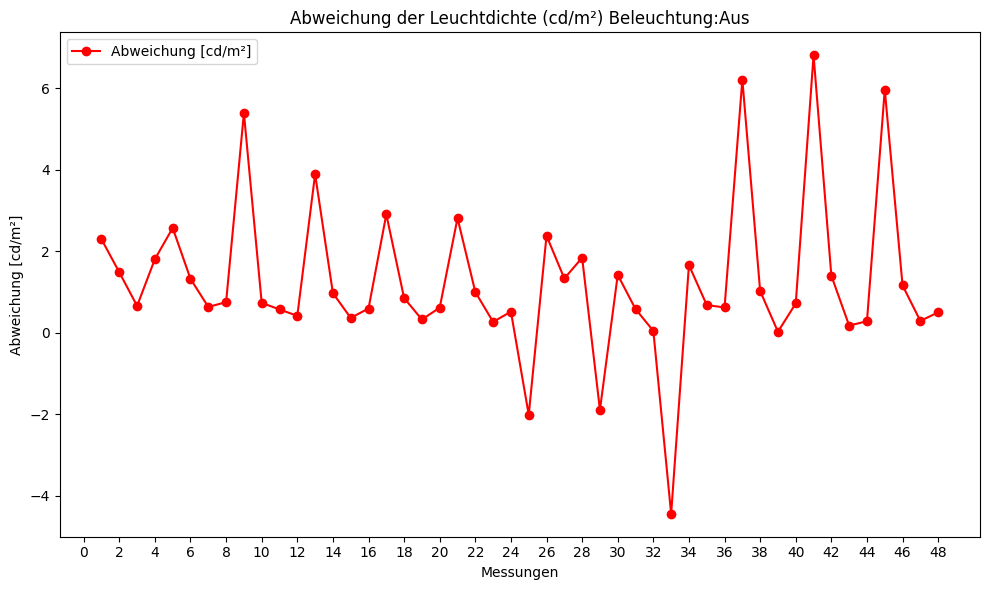

Anzahl Messpunkte: 48
MAE  = 1.612 cd/m²  (43.5 %)
RMSE = 2.312 cd/m²  (62.4 %)
Bias = 1.265 cd/m²  (34.1 %)  [positiv = Unterschätzung durch Modell]


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Daten der Leuchtdichte und Schätzung extrahieren
leuchtdichte_cd_m2 = [
    2.367, 1.558, 0.732, 1.881,
    2.615, 1.367, 0.677, 0.795,
    5.406, 0.747, 0.586, 0.429,
    3.968, 1.045, 0.438, 0.668,
    2.95,  0.894, 0.369, 0.659,
    2.827, 1.013, 0.28,  0.531,
    34.48, 3.085, 2.035, 2.545,
    34.6,  1.773, 0.935, 0.399,
    32.05, 1.804, 0.823, 0.764,
    6.664, 1.478, 0.478, 1.172,
    7.044, 1.634, 0.409, 0.517,
    6.06,  1.255, 0.383, 0.595
]

schaetzung_cd_m2 = [
    0.07, 0.07, 0.07, 0.07,
    0.04, 0.04, 0.04, 0.04,
    0.01, 0.01, 0.01, 0.01,
    0.07, 0.07, 0.07, 0.07,
    0.04, 0.04, 0.04, 0.04,
    0.01, 0.01, 0.01, 0.01,
    36.49, 0.70, 0.70, 0.70,
    36.49, 0.35, 0.35, 0.35,
    36.49, 0.14, 0.14, 0.14,
    0.45, 0.45, 0.45, 0.45,
    0.23, 0.23, 0.23, 0.23,
    0.09, 0.09, 0.09, 0.09,
]
# X-Achse (Messungen)
messungen = list(range(1, len(schaetzung_cd_m2) + 1))

# Erstellen des Plots für Leuchtdichte und Schätzung
plt.figure(figsize=(10, 6))

# Plot für Leuchtdichte [cd/m²]
plt.plot(messungen, leuchtdichte_cd_m2, label='Messung [cd/m²]', marker='o', color='blue')

# Plot für Schätzung [cd/m²]
plt.plot(messungen, schaetzung_cd_m2, label='Schätzung [cd/m²]', marker='x', color='green')

# Achsenbeschriftungen und Titel
plt.xlabel('Messungen')
plt.ylabel('cd/m²')
plt.title('Messung und Schätzung der Leuchtdichte (cd/m²) Beleuchtung:Aus' )

plt.xticks(np.arange(0,50,2))
# Legende hinzufügen
plt.legend()


# Plot anzeigen
plt.tight_layout()
plt.show()

# Berechnung der Abweichung zwischen Leuchtdichte und Schätzung
abweichung_cd_m2 = [leuchtdichte - schatzung for leuchtdichte, schatzung in zip(leuchtdichte_cd_m2, schaetzung_cd_m2)]

# Erstellen eines neuen Plots für die Abweichung
plt.figure(figsize=(10, 6))

# Plot für Abweichung [cd/m²]
plt.plot(messungen, abweichung_cd_m2, label='Abweichung [cd/m²]', marker='o', color='red')

# Achsenbeschriftungen und Titel
plt.xlabel('Messungen')
plt.ylabel('Abweichung [cd/m²]')
plt.title('Abweichung der Leuchtdichte (cd/m²) Beleuchtung:Aus')
plt.xticks(np.arange(0,50,2))
# Legende hinzufügen
plt.legend()



# Plot anzeigen
plt.tight_layout()
plt.show()

# --- KENNZAHLEN ---
residual = np.array(leuchtdichte_cd_m2) - np.array(schaetzung_cd_m2)  # e_i = L_mess - L_mod
mae  = np.mean(np.abs(residual))                                # MAE
rmse = np.sqrt(np.mean(residual**2))                            # RMSE
bias = np.mean(residual)                                        # Bias (MBE)

# Optionale relative Kennzahlen (in % der gemessenen mittleren Leuchtdichte)
rel_mae_pct  = mae / np.mean(leuchtdichte_cd_m2) * 100
rel_rmse_pct = rmse / np.mean(leuchtdichte_cd_m2) * 100
rel_bias_pct = bias / np.mean(leuchtdichte_cd_m2) * 100

print("Anzahl Messpunkte:", len(messungen))
print(f"MAE  = {mae:.3f} cd/m²  ({rel_mae_pct:.1f} %)")
print(f"RMSE = {rmse:.3f} cd/m²  ({rel_rmse_pct:.1f} %)")
print(f"Bias = {bias:.3f} cd/m²  ({rel_bias_pct:.1f} %)  [positiv = Unterschätzung durch Modell]")

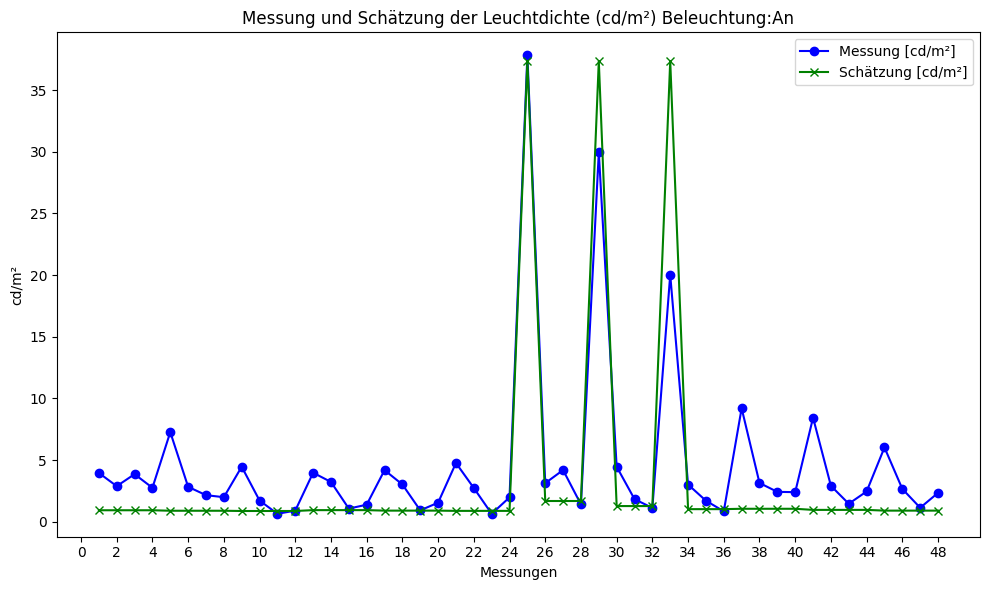

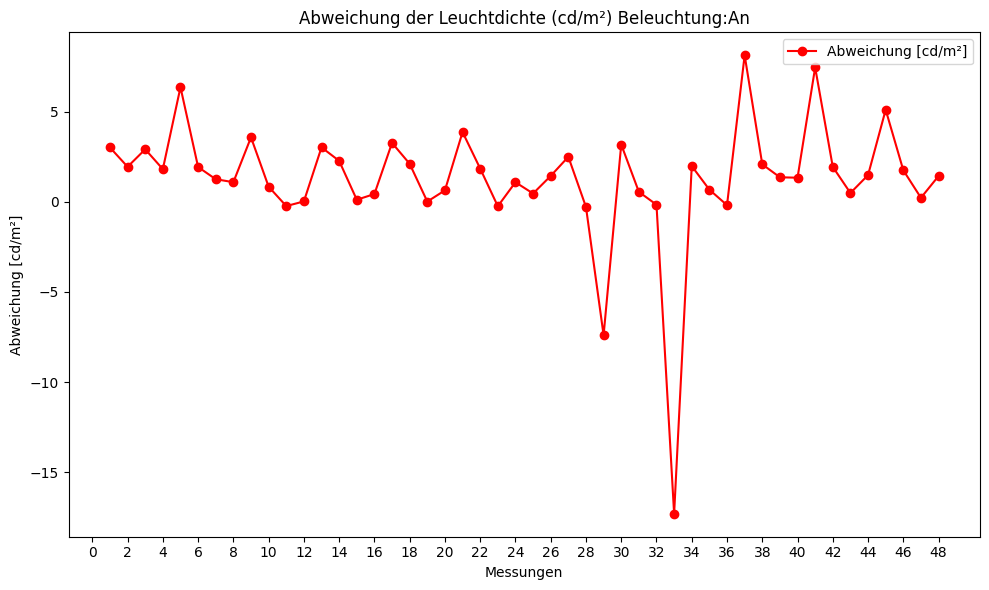

Anzahl Messpunkte: 48
MAE  = 2.359 cd/m²  (51.7 %)
RMSE = 3.770 cd/m²  (82.7 %)
Bias = 1.285 cd/m²  (28.2 %)  [positiv = Unterschätzung durch Modell]


In [18]:
# Neue Leuchtdichte- und Schätzungsdaten extrahieren
leuchtdichte_cd_m2 = [
    3.956, 2.884, 3.855, 2.753, 
    7.264, 2.831, 2.154, 1.989, 
    4.459, 1.719, 0.643, 0.901, 
    3.973, 3.224, 1.064, 1.381, 
    4.181, 3.02, 0.922, 1.545, 
    4.761, 2.735, 0.643, 1.976, 
    37.82, 3.127, 4.189, 1.405, 
    29.95, 4.462, 1.833, 1.117, 
    20.03, 3.014, 1.704, 0.843, 
    9.199, 3.142, 2.421, 2.398, 
    8.434, 2.909, 1.458, 2.453, 
    6.021, 2.661, 1.132, 2.342
]

schaetzung_cd_m2 = [
    0.93, 0.93, 0.93, 0.93,
    0.89, 0.89, 0.89, 0.89,
    0.87, 0.87, 0.87, 0.87,
    0.94, 0.94, 0.94, 0.94,
    0.90, 0.90, 0.90, 0.90,
    0.88, 0.88, 0.88, 0.88,
    37.35, 1.68, 1.68, 1.68,
    37.35, 1.27, 1.27, 1.27,
    37.35, 1.02, 1.02, 1.02,
    1.05, 1.05, 1.05, 1.05,
    0.96, 0.96, 0.96, 0.96,
    0.90, 0.90, 0.90, 0.90,
]

# X-Achse (Messungen)
messungen_2 = list(range(1, len(schaetzung_cd_m2) + 1))

# Erstellen des Plots für Leuchtdichte und Schätzung
plt.figure(figsize=(10, 6))

# Plot für Leuchtdichte [cd/m²]
plt.plot(messungen_2, leuchtdichte_cd_m2, label='Messung [cd/m²]', marker='o', color='blue')

# Plot für Schätzung [cd/m²]
plt.plot(messungen_2, schaetzung_cd_m2, label='Schätzung [cd/m²]', marker='x', color='green')

# Achsenbeschriftungen und Titel
plt.xlabel('Messungen')
plt.ylabel('cd/m²')
plt.title('Messung und Schätzung der Leuchtdichte (cd/m²) Beleuchtung:An')


# Legende hinzufügen
plt.legend()
plt.xticks(np.arange(0,50,2))

# Plot anzeigen
plt.tight_layout()
plt.show()

# Berechnung der Abweichung zwischen Leuchtdichte und Schätzung
abweichung_cd_m2_2 = [leuchtdichte - schatzung for leuchtdichte, schatzung in zip(leuchtdichte_cd_m2, schaetzung_cd_m2)]

# Erstellen eines neuen Plots für die Abweichung
plt.figure(figsize=(10, 6))

# Plot für Abweichung [cd/m²]
plt.plot(messungen_2, abweichung_cd_m2_2, label='Abweichung [cd/m²]', marker='o', color='red')

# Achsenbeschriftungen und Titel
plt.xlabel('Messungen')
plt.ylabel('Abweichung [cd/m²]')
plt.title('Abweichung der Leuchtdichte (cd/m²) Beleuchtung:An')

# Legende hinzufügen
plt.legend()
plt.xticks(np.arange(0,50,2))
# Plot anzeigen
plt.tight_layout()
plt.show()

# --- KENNZAHLEN ---
residual = np.array(leuchtdichte_cd_m2) - np.array(schaetzung_cd_m2)  # e_i = L_mess - L_mod
mae  = np.mean(np.abs(residual))                                # MAE
rmse = np.sqrt(np.mean(residual**2))                            # RMSE
bias = np.mean(residual)                                        # Bias (MBE)

# Optionale relative Kennzahlen (in % der gemessenen mittleren Leuchtdichte)
rel_mae_pct  = mae / np.mean(leuchtdichte_cd_m2) * 100
rel_rmse_pct = rmse / np.mean(leuchtdichte_cd_m2) * 100
rel_bias_pct = bias / np.mean(leuchtdichte_cd_m2) * 100

print("Anzahl Messpunkte:", len(messungen))
print(f"MAE  = {mae:.3f} cd/m²  ({rel_mae_pct:.1f} %)")
print(f"RMSE = {rmse:.3f} cd/m²  ({rel_rmse_pct:.1f} %)")
print(f"Bias = {bias:.3f} cd/m²  ({rel_bias_pct:.1f} %)  [positiv = Unterschätzung durch Modell]")

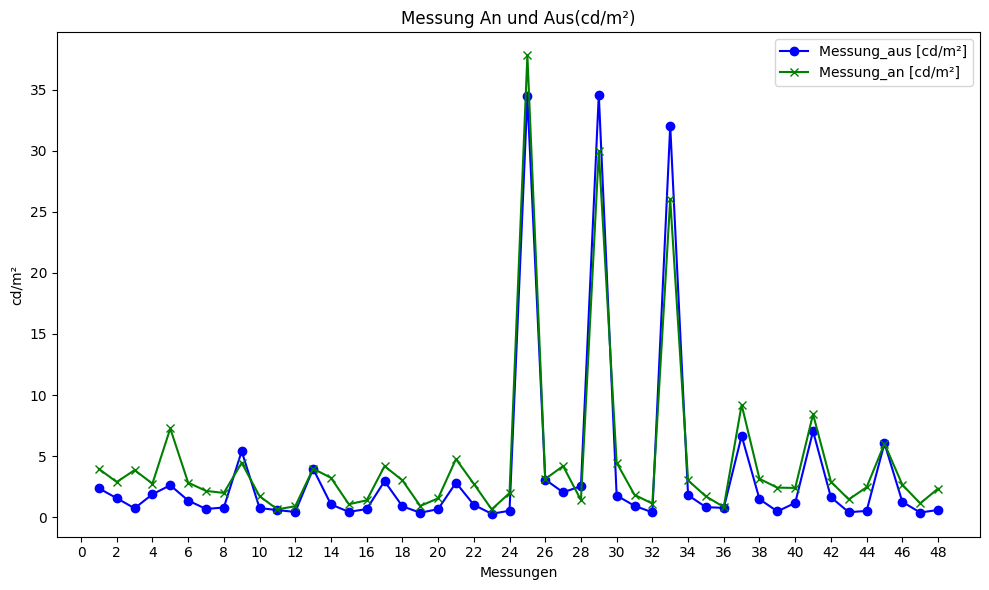

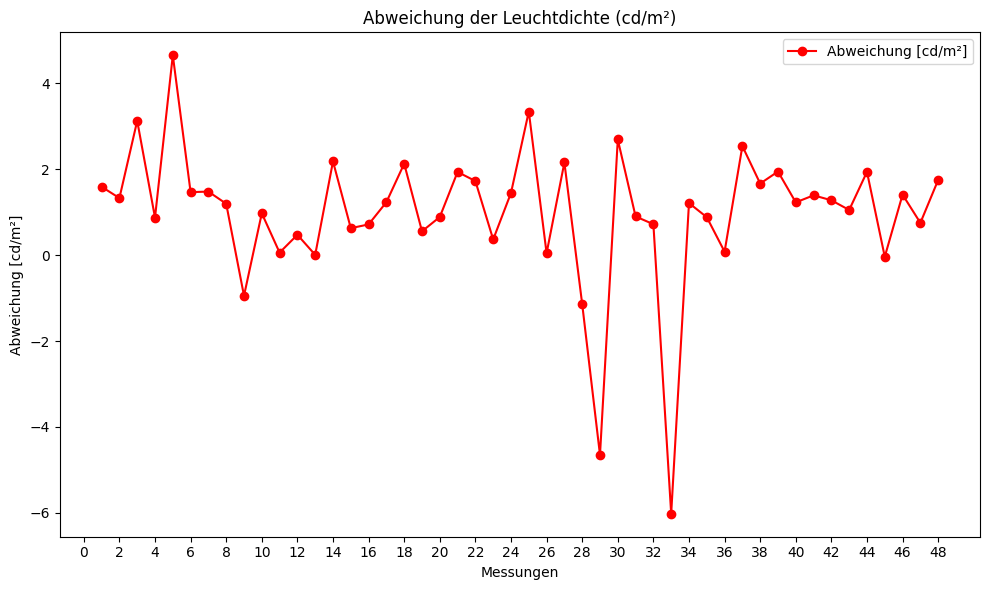

Anzahl Messpunkte: 48
MAE  = 1.515 cd/m²  (33.2 %)
RMSE = 1.937 cd/m²  (42.5 %)
Bias = 0.982 cd/m²  (21.5 %)  [positiv = Unterschätzung durch Modell]


In [17]:
import numpy as np
import matplotlib.pyplot as plt

messung_aus = [
    2.367, 1.558, 0.732, 1.881,
    2.615, 1.367, 0.677, 0.795,
    5.406, 0.747, 0.586, 0.429,
    3.968, 1.045, 0.438, 0.668,
    2.95,  0.894, 0.369, 0.659,
    2.827, 1.013, 0.28,  0.531,
    34.48, 3.085, 2.035, 2.545,
    34.6,  1.773, 0.935, 0.399,
    32.05, 1.804, 0.823, 0.764,
    6.664, 1.478, 0.478, 1.172,
    7.044, 1.634, 0.409, 0.517,
    6.06,  1.255, 0.383, 0.595
]

messung_an= [
     3.956, 2.884, 3.855, 2.753, 
    7.264, 2.831, 2.154, 1.989, 
    4.459, 1.719, 0.643, 0.901, 
    3.973, 3.224, 1.064, 1.381, 
    4.181, 3.02, 0.922, 1.545, 
    4.761, 2.735, 0.643, 1.976, 
    37.82, 3.127, 4.189, 1.405, 
    29.95, 4.462, 1.833, 1.117, 
    26.03, 3.014, 1.704, 0.843, 
    9.199, 3.142, 2.421, 2.398, 
    8.434, 2.909, 1.458, 2.453, 
    6.021, 2.661, 1.132, 2.342
]


# X-Achse (Messungen)
messungen = list(range(1, len(messung_aus) + 1))

# Erstellen des Plots für Leuchtdichte und Schätzung
plt.figure(figsize=(10, 6))

# Plot für Messung_aus[cd/m²]
plt.plot(messungen,messung_aus,  label='Messung_aus [cd/m²]', marker='o', color='blue')

# Plot für Messung_an [cd/m²]
plt.plot(messungen,messung_an,  label='Messung_an [cd/m²]', marker='x', color='green')

# Achsenbeschriftungen und Titel
plt.xlabel('Messungen')
plt.ylabel('cd/m²')
plt.title('Messung An und Aus(cd/m²)')


# Legende hinzufügen
plt.legend()
plt.xticks(np.arange(0,50,2))

# Plot anzeigen
plt.tight_layout()
plt.show()

# Berechnung der Abweichung zwischen Leuchtdichte und Schätzung

abweichung_cd_m2_2 = np.array(messung_an)-np.array(messung_aus)


# Erstellen eines neuen Plots für die Abweichung
plt.figure(figsize=(10, 6))

# Plot für Abweichung [cd/m²]
plt.plot(messungen, abweichung_cd_m2_2, label='Abweichung [cd/m²]', marker='o', color='red')

# Achsenbeschriftungen und Titel
plt.xlabel('Messungen')
plt.ylabel('Abweichung [cd/m²]')
plt.title('Abweichung der Leuchtdichte (cd/m²)')

# Legende hinzufügen
plt.legend()
plt.xticks(np.arange(0,50,2))
# Plot anzeigen
plt.tight_layout()
plt.show()

# --- KENNZAHLEN ---
#residual = np.array(leuchtdichte_cd_m2) - np.array(schaetzung_cd_m2)  # e_i = L_mess - L_mod
mae  = np.mean(np.abs(abweichung_cd_m2_2))                                # MAE
rmse = np.sqrt(np.mean(abweichung_cd_m2_2**2))                            # RMSE
bias = np.mean(abweichung_cd_m2_2)                                        # Bias (MBE)

# Optionale relative Kennzahlen (in % der gemessenen mittleren Leuchtdichte)
rel_mae_pct  = mae / np.mean(leuchtdichte_cd_m2) * 100
rel_rmse_pct = rmse / np.mean(leuchtdichte_cd_m2) * 100
rel_bias_pct = bias / np.mean(leuchtdichte_cd_m2) * 100

print("Anzahl Messpunkte:", len(messungen))
print(f"MAE  = {mae:.3f} cd/m²  ({rel_mae_pct:.1f} %)")
print(f"RMSE = {rmse:.3f} cd/m²  ({rel_rmse_pct:.1f} %)")
print(f"Bias = {bias:.3f} cd/m²  ({rel_bias_pct:.1f} %)  [positiv = Unterschätzung durch Modell]")

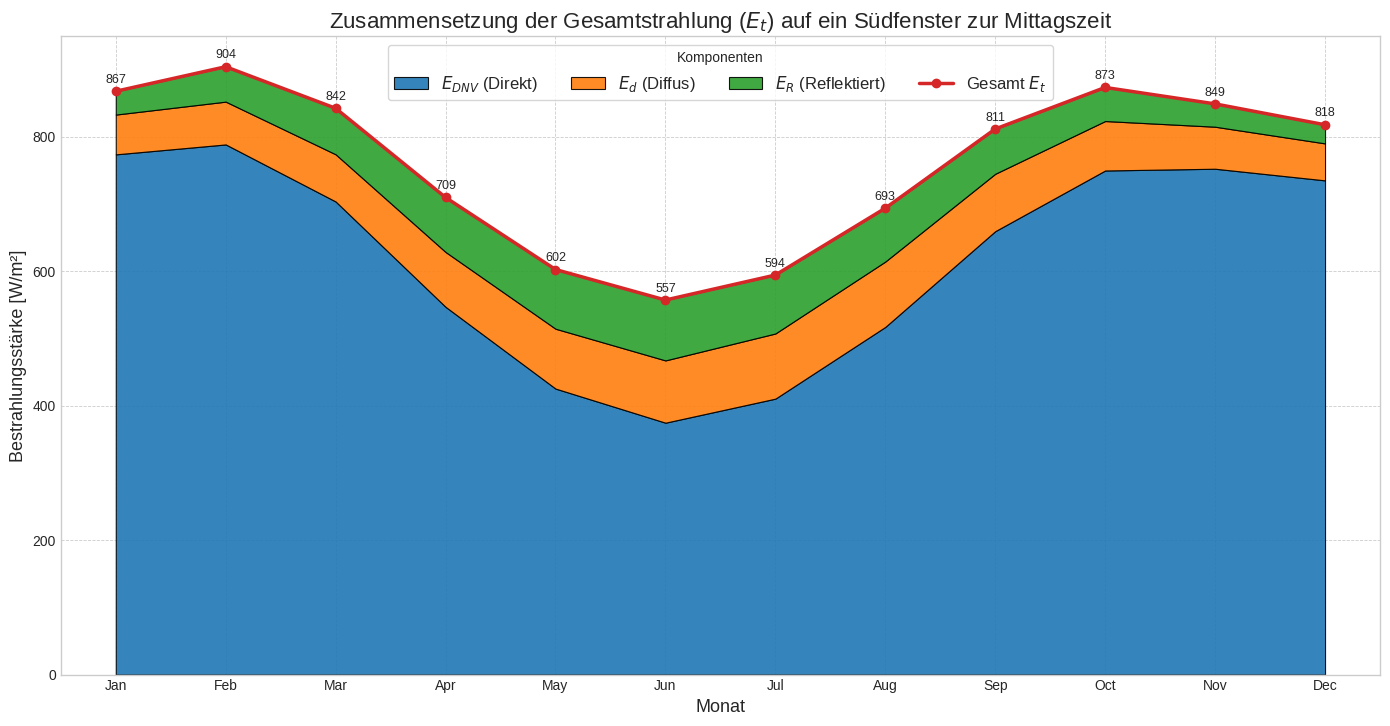

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import json

# =============================================================================
# 1) DATEN LADEN & MONATSREIHENFOLGE FESTLEGEN
# =============================================================================
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

# feste, saubere Reihenfolge (nicht auf dict-Keys verlassen)
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

p_g = 0.2   # Bodenreflexion
psi_sued = 0
phi_noon = 180

gamma_s_monthly = {
    "Jan": 21.1, "Feb": 30.5, "Mar": 41.3, "Apr": 52.9, "May": 61.2, "Jun": 64.4,
    "Jul": 61.4, "Aug": 53.1, "Sep": 41.6, "Oct": 30.2, "Nov": 21.0, "Dec": 17.6
}

E_DNV_list, E_d_list, E_R_list = [], [], []

# =============================================================================
# 2) KOMPONENTEN BERECHNEN
# =============================================================================
for month in months:
    A = solar_data[month]["A"]
    B = solar_data[month]["B"]
    C = solar_data[month]["C"]

    gamma_s_deg = gamma_s_monthly[month]
    gamma_s_rad = np.deg2rad(gamma_s_deg)

    # Direkte Normalstrahlung bei klarem Himmel
    E_DN = A / np.exp(B / np.sin(gamma_s_rad))

    # Südfenster zur Mittagszeit
    gamma_deg = phi_noon - 180 - psi_sued
    cos_theta_v = np.cos(gamma_s_rad) * np.cos(np.deg2rad(gamma_deg))
    # numerische Stabilität
    cos_theta_v = float(np.clip(cos_theta_v, -1, 1))

    # Komponenten
    E_DNV = E_DN * max(0, cos_theta_v)

    Y = 0.55 + 0.437 * cos_theta_v + 0.313 * cos_theta_v**2 if cos_theta_v > -0.2 else 0.45
    E_d  = C * Y * E_DN

    E_R  = E_DN * (C + np.sin(gamma_s_rad)) * p_g * 0.5

    E_DNV_list.append(E_DNV)
    E_d_list.append(E_d)
    E_R_list.append(E_R)

E_DNV_array = np.array(E_DNV_list)
E_d_array   = np.array(E_d_list)
E_R_array   = np.array(E_R_list)
E_t_array   = E_DNV_array + E_d_array + E_R_array

# =============================================================================
# 3) PLOT – STACKPLOT + GESAMT-LINIE UND LESBARE LEGENDE
# =============================================================================
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

# numerische X-Achse + Monatslabels
x = np.arange(len(months))

# gestapeltes Flächendiagramm (mit Konturlinien für bessere Trennung)
stacks = ax.stackplot(
    x, E_DNV_array, E_d_array, E_R_array,
    labels=[r'$E_{DNV}$ (Direkt)', r'$E_d$ (Diffus)', r'$E_R$ (Reflektiert)'],
    alpha=0.9
)
for poly in stacks:  # dünne Kontur
    poly.set_linewidth(0.8)
    poly.set_edgecolor('k')

# Gesamtwert als Linie mit Markern
total_line, = ax.plot(x, E_t_array, marker='o', linewidth=2.5, label=r'Gesamt $E_t$', zorder=5)

# Achsen & Titel
ax.set_title('Zusammensetzung der Gesamtstrahlung ($E_t$) auf ein Südfenster zur Mittagszeit', fontsize=16)
ax.set_xlabel('Monat', fontsize=13)
ax.set_ylabel('Bestrahlungsstärke [W/m²]', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.set_ylim(0)
ax.set_xlim(-0.5, len(x)-0.5)
ax.margins(x=0.02)
ax.grid(True, linestyle='--', linewidth=0.6)

# Legende: oben außerhalb, 4 Spalten, mit Titel
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1),
          ncol=4, frameon=True, fontsize=12, title='Komponenten')

# dezente Werte-Annotationen (nicht überlappen)
for xi, yt in zip(x, E_t_array):
    ax.annotate(f'{yt:.0f}', (xi, yt), textcoords='offset points', xytext=(0, 6),
                ha='center', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.92])  # Platz für die Legende oben
plt.show()
